<a href="https://colab.research.google.com/github/antfolk/BMEN35_2023/blob/main/Session3/BMEN35_Ex10_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3
## Fill in your name below
Albert Ahnlide

## Your mission is now the following:

Part A) You will use sklearn to check if the Linear Regression model in the previous notebook is the same as the one in sklearn.

Part B) You will use sklearn to check if the Logistic Regression model in the previous note is the same as the one ine sklearn.

## When you have finished this assignment , save this notebook and submit it as assignment 3

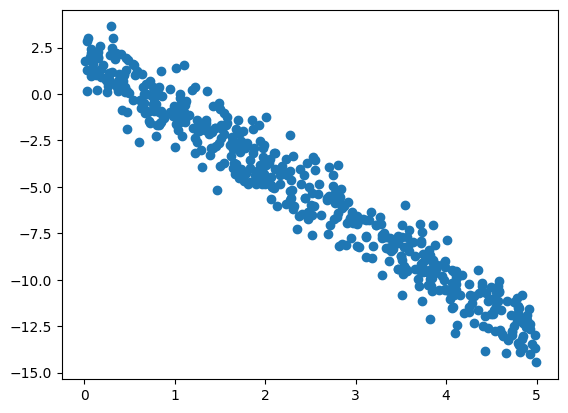

[[ 2.04136679]
 [-3.00509069]]
[2.04136679]
[[-3.00509069]]


In [15]:
# Part A
import numpy as np
import matplotlib.pyplot as plt

# Lets start by making a simple example
N = 500 # Number of datapoints
X = 5 *np.random.rand(N,1)
y =  2 - 3 * X + np.random.randn(N,1)

# Lets make a scatter plot of the data to see what it looks like
plt.scatter(X,y)
plt.show()

# We add a column of ones for the intercept (theta0)
X_b = np.hstack((np.ones([N,1]),X))
theta = np.dot(np.dot(np.linalg.inv(np.dot(X_b.T,X_b)),X_b.T),y)
print(theta)

# Here is where your code starts. We will start you off with
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,y)
print(reg.intercept_)
print(reg.coef_)

# The reg object will have some parameters named .intercept_ and .coef_

The Linear Regression in the previous notebook seems to produce the same intercept as well as coefficient as the linear regression in the package sklearn. 

In [2]:
# Part B
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Four features x1,x2,x3,x4 and two classes (binary classification)
X, y = make_classification(n_samples = 1000,n_features=4, n_classes = 2,random_state=0)
# Lets split the data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train_i = np.c_[np.ones((np.shape(X_train)[0],1)),X_train] # Add 1 for intercept theta_0
X_test_i = np.c_[np.ones((np.shape(X_test)[0],1)),X_test] #Add 1 for intercept theta_0
theta = np.zeros((np.shape(X_train_i)[1])) # Intialize theta to zero
# Lets again use gradient descent to find the right values for theta
n_epochs = 20 # The number of epoch
eta = 0.01 # Our learning rate
J = np.zeros(n_epochs)
for i in range(n_epochs):
    theta_T_X = np.dot(X_train_i, theta)  # X*theta
    #p_hat = 1 / (1 + np.exp(-theta_T_X))  # We pass this through the logistic function
    p_hat = np.exp(theta_T_X) / (1 + np.exp(theta_T_X))
    error = y_train - p_hat
    J[i] = np.sum(-(y_train*np.log(p_hat) + (1-y_train)*np.log(1-p_hat)))/len(y_train)
    grad = np.dot(X_train_i.T, error)
    theta = theta + eta * grad

print(theta)
y_hat = 1 / (1 + np.exp(-np.dot(X_test_i, theta))) # Calculate probabilities using our thetas.
y_hat = np.round(y_hat) # Easy cheat instead of using if statements or similar
acc = np.sum(y_hat == y_test)/len(y_test) # Calculate accuracy
print(acc)

# Here is where your code start. We will start you off with
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)
# The reg object will have some parameters named .intercept_ and .coef_ print them
# Also predict based on Xtest and calculate accuracy to compare with the above code
print("Intercept: ", clf.intercept_)
print("Coefficients: ", clf.coef_)

#y_hat = clf.predict(X_test)
#acc = np.sum(y_hat == y_test)/len(y_test) # Calculate accuracy

clf.predict(X_test)
score = clf.score(X_test, y_test)

print("Accuracy: ", score)

[ 0.7932279   2.35863558 -0.06656008  1.07331921  1.68374101]
0.956
Intercept:  [0.72929775]
Coefficients:  [[ 2.22266243 -0.05164397  1.00240911  1.59078548]]
Accuracy:  0.956


The accuracy seems to be the same between the Logistic Regression from the previous notebook and the one found in the package sklearn. However, both the intercept as well as the coefficients are not the same. They are however very similar, but not the same. 
Therefore we can say that the Linear Regression works the same in sklearn as the implemented version in this notebook while the Logistic Regression does not, but produces a very similar result. 